<a href="https://colab.research.google.com/github/pachterlab/CP_2022/blob/main/notebooks/swissRoll/swissDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

!pip3 install --quiet matplotlib
!pip3 install --quiet scikit-learn

!pip3 install --quiet umap-learn

     |████████████████████████████████| 86 kB 2.8 MB/s 
     |████████████████████████████████| 1.1 MB 39.1 MB/s 


In [5]:
import pandas as pd
import numpy as np


import random

import matplotlib.pyplot as plt
from sklearn.neighbors import NeighborhoodComponentsAnalysis, NearestNeighbors
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale

import time

import seaborn as sns
import umap
from scipy import stats
import scipy.io as sio
import matplotlib
matplotlib.rc('axes',edgecolor='black')
%matplotlib inline

sns.set_style('white')

In [148]:
#Generate random points and one set of equidistant points

from numpy import random 

#https://github.com/scikit-learn/scikit-learn/blob/bac89c2/sklearn/datasets/samples_generator.py#L1321

n_samples = 2000
noise=0

t = 1.5 * np.pi * (1 + 2 * np.random.rand(1, n_samples))
t= np.append(t,np.array([10,12,14]))
t = np.reshape(t, (1,n_samples+3))

x = .005*t * np.cos(t)

y = 21 * np.random.rand(1, n_samples)
y = np.append(y,np.array([10,13,10]))
y = np.reshape(y, (1,n_samples+3))

y = 0.005*y

z = .005*t * np.sin(t)

X = np.concatenate((x, y, z))
X += noise * np.random.randn(3, n_samples+3)
X = X.T
t = np.squeeze(t)




In [147]:
x.shape

(2003,)

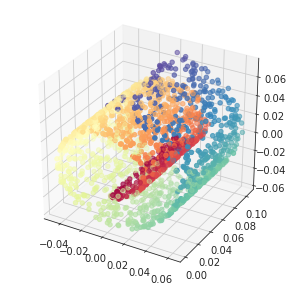

In [149]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection='3d')

ax.scatter3D(X[:,0],X[:,1],X[:,2], c=t, cmap=plt.cm.Spectral)


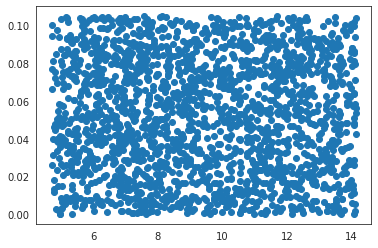

In [131]:
plt.scatter(t,y)

In [151]:
y

array([[0.07213846, 0.02801806, 0.05574451, ..., 0.05      , 0.065     ,
        0.05      ]])

In [101]:
#Get umap embedding
reducer = umap.UMAP(n_components = 2, random_state = 42)

umap2d = reducer.fit_transform(X)
umap2d.shape

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(2000, 2)

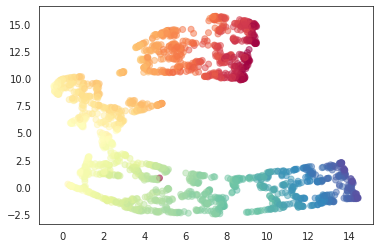

In [107]:
plt.scatter(umap2d[:,0],umap2d[:,1], c=t, cmap=plt.cm.Spectral,alpha=0.5)

Calculate distances of equidistant points in UMAP